In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [38]:
import warnings
warnings.filterwarnings(action='ignore') 

#### Data Load

In [16]:
DATA_DIR = "../data/"
data = pd.read_pickle(DATA_DIR + 'base_dataset_before_std.pkl') #불러오기

#### Standard Scaling

In [17]:
s = ClassificationExperiment()
s.setup(data, target=data.columns[-1], session_id=123, use_gpu=True, normalize=True)
s

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 970, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet

,Description,Value
0,Session id,123
1,Target,Attrition_Flag
2,Target type,Binary
3,Original data shape,"(10127, 21)"
4,Transformed data shape,"(10127, 21)"
5,Transformed train set shape,"(7088, 21)"
6,Transformed test set shape,"(3039, 21)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 970, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet

In [18]:
best = s.compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9691,0.9926,0.8789,0.9257,0.9013,0.8830,0.8837,0.4510
gbc,Gradient Boosting Classifier,0.9643,0.9881,0.8333,0.9380,0.8822,0.8612,0.8636,1.3540
rf,Random Forest Classifier,0.9577,0.9874,0.7981,0.9296,0.8585,0.8338,0.8374,0.2360
ada,Ada Boost Classifier,0.9540,0.9829,0.8131,0.8923,0.8502,0.8231,0.8248,0.3260
et,Extra Trees Classifier,0.9372,0.9796,0.6603,0.9286,0.7710,0.7359,0.7507,0.1750
dt,Decision Tree Classifier,0.9306,0.8643,0.7665,0.7955,0.7795,0.7384,0.7394,0.0600
lr,Logistic Regression,0.9010,0.9205,0.5707,0.7553,0.6494,0.5931,0.6014,0.0320
lda,Linear Discriminant Analysis,0.9000,0.9187,0.5891,0.7375,0.6542,0.5966,0.6022,0.0330
knn,K Neighbors Classifier,0.8979,0.8833,0.4943,0.7932,0.6085,0.5534,0.5742,0.0430
ridge,Ridge Classifier,0.8964,0.0000,0.4495,0.8291,0.5819,0.5288,0.5617,0.0260


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=123, reg_alpha=0.0, reg_lambda=0.0,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [19]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

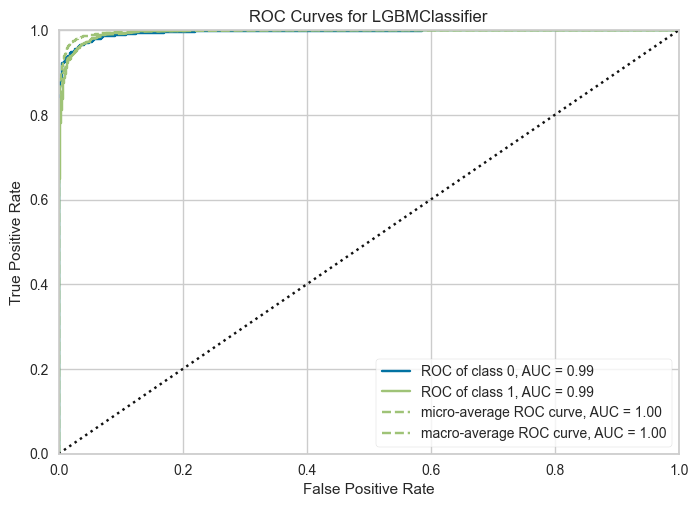

In [20]:
s.plot_model(best, plot='auc')

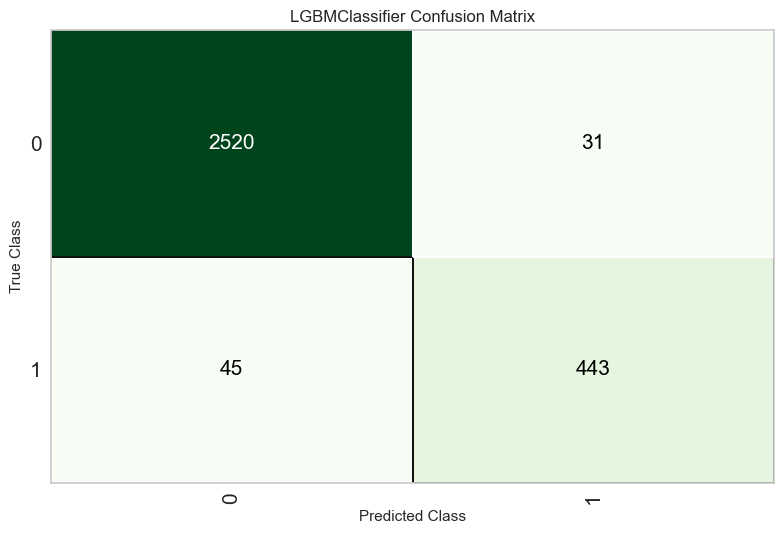

In [21]:
s.plot_model(best, plot='confusion_matrix')
# test set에 대하여

In [22]:
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9750,0.9950,0.9078,0.9346,0.9210,0.9061,0.9063


,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Male,Marital_Status_Uneducated,Marital_Status_Single,Marital_Status_Divorced,Attrition_Flag,prediction_label,prediction_score
3676,49,3,1,2,1,36,5,3,3,1438.300049,...,73,0.825,0.000,False,True,False,False,0,0,0.9994
840,64,0,3,1,1,51,6,3,1,4920.000000,...,31,0.348,0.232,False,True,False,False,0,0,0.9991
7373,41,2,3,3,1,31,3,1,3,8228.000000,...,68,0.545,0.235,True,False,True,False,0,0,0.9997
3140,49,2,2,3,1,35,4,3,2,2532.000000,...,76,0.727,0.839,False,True,False,False,0,0,0.9999
6563,35,2,2,2,1,15,4,2,1,1438.300049,...,82,0.640,0.580,False,True,False,False,0,0,0.9997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,44,4,3,1,1,28,5,2,3,2020.000000,...,45,0.552,0.000,False,True,False,False,1,1,0.9978
3563,45,3,3,2,1,35,5,3,2,3538.000000,...,74,0.762,0.000,True,True,False,False,0,0,0.9993
1091,65,0,2,2,1,36,5,2,3,2163.000000,...,57,0.839,0.431,True,False,True,False,0,0,0.9921
8648,44,3,2,3,1,36,2,2,1,3605.000000,...,78,0.814,0.000,True,True,False,False,0,0,0.6428


In [23]:
predictions = s.predict_model(best, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9923,0.9989,0.9723,0.9796,0.9759,0.9714,0.9714


#### minmax scaler

In [31]:
s = ClassificationExperiment()
s.setup(data, target=data.columns[-1], session_id=123, use_gpu=True, normalize=True, normalize_method='minmax')
s

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 970, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet

,Description,Value
0,Session id,123
1,Target,Attrition_Flag
2,Target type,Binary
3,Original data shape,"(10127, 21)"
4,Transformed data shape,"(10127, 21)"
5,Transformed train set shape,"(7088, 21)"
6,Transformed test set shape,"(3039, 21)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 970, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet

In [32]:
best = s.compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9701,0.9926,0.8833,0.9277,0.9045,0.8868,0.8875,0.4440
gbc,Gradient Boosting Classifier,0.9643,0.9881,0.8333,0.9380,0.8822,0.8612,0.8636,1.3480
rf,Random Forest Classifier,0.9575,0.9873,0.7990,0.9276,0.8582,0.8334,0.8368,0.2390
ada,Ada Boost Classifier,0.9540,0.9829,0.8131,0.8923,0.8502,0.8231,0.8248,0.3270
et,Extra Trees Classifier,0.9372,0.9796,0.6603,0.9286,0.7710,0.7359,0.7507,0.1730
dt,Decision Tree Classifier,0.9310,0.8652,0.7683,0.7963,0.7810,0.7402,0.7410,0.0580
lr,Logistic Regression,0.9017,0.9164,0.5294,0.7912,0.6334,0.5793,0.5954,0.0490
lda,Linear Discriminant Analysis,0.9000,0.9187,0.5891,0.7375,0.6542,0.5966,0.6022,0.0320
svm,SVM - Linear Kernel,0.8995,0.0000,0.5856,0.7467,0.6516,0.5942,0.6030,0.0320
ridge,Ridge Classifier,0.8956,0.0000,0.4416,0.8304,0.5756,0.5224,0.5569,0.0240


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=123, reg_alpha=0.0, reg_lambda=0.0,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [33]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

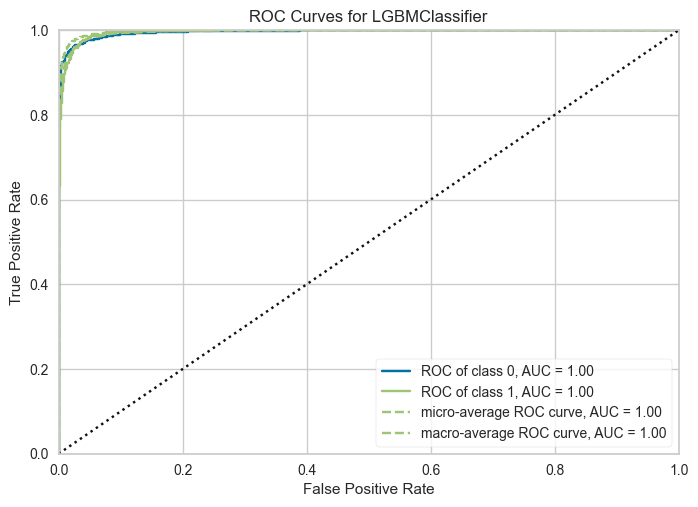

In [34]:
s.plot_model(best, plot='auc')

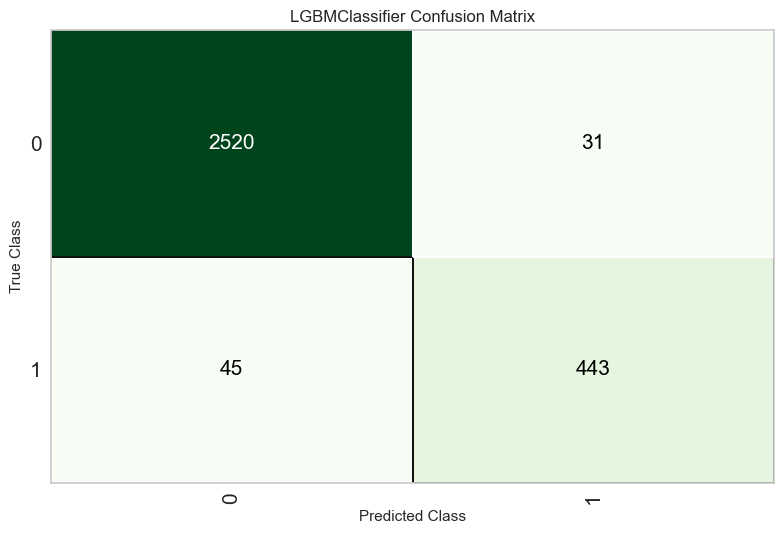

In [35]:
s.plot_model(best, plot='confusion_matrix')
# test set에 대하여

In [36]:
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9750,0.9955,0.9078,0.9346,0.9210,0.9061,0.9063


,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Male,Marital_Status_Uneducated,Marital_Status_Single,Marital_Status_Divorced,Attrition_Flag,prediction_label,prediction_score
3676,49,3,1,2,1,36,5,3,3,1438.300049,...,73,0.825,0.000,False,True,False,False,0,0,0.9996
840,64,0,3,1,1,51,6,3,1,4920.000000,...,31,0.348,0.232,False,True,False,False,0,0,0.9991
7373,41,2,3,3,1,31,3,1,3,8228.000000,...,68,0.545,0.235,True,False,True,False,0,0,0.9996
3140,49,2,2,3,1,35,4,3,2,2532.000000,...,76,0.727,0.839,False,True,False,False,0,0,0.9998
6563,35,2,2,2,1,15,4,2,1,1438.300049,...,82,0.640,0.580,False,True,False,False,0,0,0.9997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,44,4,3,1,1,28,5,2,3,2020.000000,...,45,0.552,0.000,False,True,False,False,1,1,0.9962
3563,45,3,3,2,1,35,5,3,2,3538.000000,...,74,0.762,0.000,True,True,False,False,0,0,0.9993
1091,65,0,2,2,1,36,5,2,3,2163.000000,...,57,0.839,0.431,True,False,True,False,0,0,0.9876
8648,44,3,2,3,1,36,2,2,1,3605.000000,...,78,0.814,0.000,True,True,False,False,0,0,0.6415


In [37]:
predictions = s.predict_model(best, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9924,0.9991,0.9723,0.9802,0.9762,0.9717,0.9717


#### robust scaling

In [41]:
s = ClassificationExperiment()
s.setup(data, target=data.columns[-1], session_id=125, use_gpu=True, normalize=True, normalize_method='robust')
s

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 970, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet

,Description,Value
0,Session id,125
1,Target,Attrition_Flag
2,Target type,Binary
3,Original data shape,"(10127, 21)"
4,Transformed data shape,"(10127, 21)"
5,Transformed train set shape,"(7088, 21)"
6,Transformed test set shape,"(3039, 21)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 970, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet

In [42]:
best = s.compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9701,0.9928,0.8832,0.9284,0.9047,0.8870,0.8878,0.4530
gbc,Gradient Boosting Classifier,0.9656,0.9902,0.8481,0.9320,0.8877,0.8674,0.8690,1.3550
rf,Random Forest Classifier,0.9592,0.9878,0.8147,0.9236,0.8653,0.8414,0.8440,0.2390
ada,Ada Boost Classifier,0.9561,0.9851,0.8428,0.8798,0.8607,0.8347,0.8351,0.3310
et,Extra Trees Classifier,0.9379,0.9797,0.6699,0.9234,0.7760,0.7411,0.7542,0.1780
dt,Decision Tree Classifier,0.9367,0.8796,0.7954,0.8086,0.8014,0.7638,0.7642,0.0590
lda,Linear Discriminant Analysis,0.9035,0.9235,0.6102,0.7456,0.6702,0.6144,0.6192,0.0350
lr,Logistic Regression,0.9034,0.9255,0.5804,0.7635,0.6586,0.6036,0.6118,0.0410
knn,K Neighbors Classifier,0.9027,0.8923,0.5294,0.7981,0.6361,0.5825,0.5992,0.0460
ridge,Ridge Classifier,0.8979,0.0000,0.4513,0.8393,0.5859,0.5338,0.5678,0.0270


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device='gpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=125, reg_alpha=0.0, reg_lambda=0.0,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [43]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

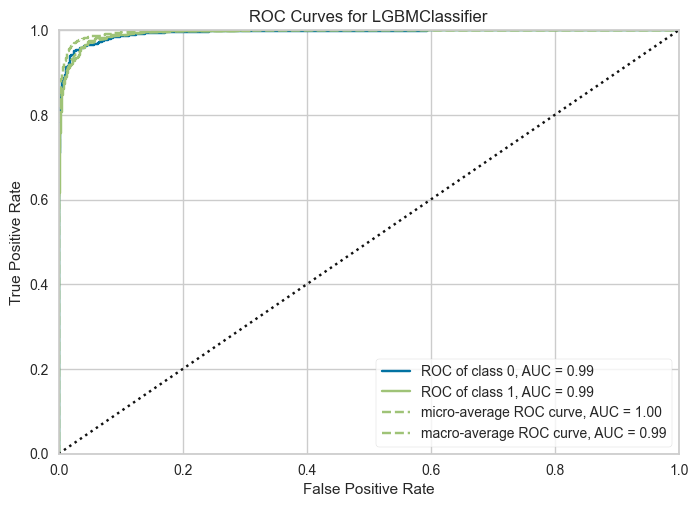

In [44]:
s.plot_model(best, plot='auc')

In [45]:
s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9717,0.9935,0.8730,0.9467,0.9083,0.8916,0.8926


,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Male,Marital_Status_Uneducated,Marital_Status_Single,Marital_Status_Divorced,Attrition_Flag,prediction_label,prediction_score
9411,40,2,4,2,3,31,1,2,1,3735.000000,...,130,0.757,0.395,True,True,False,False,0,0,0.9999
5561,47,3,4,3,1,36,5,1,3,4284.000000,...,85,0.848,0.444,True,True,False,False,0,0,0.9998
4666,40,2,5,2,1,25,2,2,4,3795.000000,...,32,0.778,0.663,False,True,False,False,1,1,0.8388
6379,60,0,2,2,1,36,6,3,2,4115.000000,...,61,1.179,0.299,False,False,True,False,0,0,0.9998
5581,52,2,2,1,1,41,4,2,2,5616.000000,...,62,0.590,0.429,False,True,False,False,0,0,0.9872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,40,4,2,3,1,36,6,3,3,5797.000000,...,33,0.571,0.307,True,True,False,False,0,0,0.8618
5262,33,3,3,1,1,20,5,1,3,1438.300049,...,72,0.636,0.000,False,True,False,False,0,0,0.9995
8821,45,4,4,1,1,36,2,1,1,2737.000000,...,80,0.569,0.000,False,True,False,False,0,0,0.9957
4987,44,5,3,3,1,36,4,2,3,5791.000000,...,67,0.861,0.000,False,True,False,False,0,0,0.9992


In [46]:
predictions = s.predict_model(best, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9914,0.9985,0.9619,0.9843,0.9730,0.9679,0.9679


In [49]:
# Scaler 별 비교

'''
 	                             Model	Accuracy	AUC	Recall	Prec.	F1	Kappa	MCC
std 	Light Gradient Boosting Machine	0.9923	0.9989	0.9723	0.9796	0.9759	0.9714	0.9714	
minmax	Light Gradient Boosting Machine	0.9924	0.9991	0.9723	0.9802	0.9762	0.9717	0.9717
robust	Light Gradient Boosting Machine	0.9914	0.9985	0.9619	0.9843	0.9730	0.9679	0.9679
'''

'\n \t                             Model\tAccuracy\tAUC\tRecall\tPrec.\tF1\tKappa\tMCC\nstd \tLight Gradient Boosting Machine\t0.9923\t0.9989\t0.9723\t0.9796\t0.9759\t0.9714\t0.9714\t\nminmax\tLight Gradient Boosting Machine\t0.9924\t0.9991\t0.9723\t0.9802\t0.9762\t0.9717\t0.9717\nrobust\tLight Gradient Boosting Machine\t0.9914\t0.9985\t0.9619\t0.9843\t0.9730\t0.9679\t0.9679\n'

In [55]:
# 각 데이터 포인트의 클래스 확률을 확인합니다.
# 'Score' 열은 예측된 클래스 1(Positive)의 확률을 나타냅니다.
probability_column_name = 'prediction_score'
predictions[probability_column_name].describe()

count    10127.000000
mean         0.985654
std          0.046762
min          0.504600
25%          0.995200
50%          0.999300
75%          0.999800
max          1.000000
Name: prediction_score, dtype: float64